# Mappeoppgave 5a)

In [ ]:
# laste ned nødvendige pakker
from bs4 import BeautifulSoup
import requests

# funksjom som leser av html
def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

#data om ventetider
tables=fetch_html_tables('https://www.helsedirektoratet.no/nyheter/ventetider-og-aktivitet-i-spesialisthelsetjenesten-2021')
table_html=tables[0]

#printer toppen av tabellen
print(str(table_html)[:1000])

: 

In [ ]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==6:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
            
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])


[['Sektor', 'Antall dager ventetid\t\t\t2020', 'Antall dager ventetid\t\t\t2021'], ['Somatikk', '65', '63'], ['Psykisk helsevern for voksne', '44', '46'], ['Psykisk helsevern for barn og unge', '44', '50'], ['Tverrfaglig spesialisert rusbehandling (TSB)', '32', '33'], ['Alle sektorer', '63', '61']]


In [ ]:
';'.join(table[1])

'Somatikk;65;63'

In [ ]:
# lage tabell som filname 

def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('ventetid.csv',table)

In [ ]:
import pandas as pd
v =pd.read_csv('ventetid.csv', delimiter=';')
v =v.rename(columns={'Antall dager ventetid\t\t\t2020': 'Antall dager ventetid 2020'})
v = v[:-1] # Fjerne den raden med alle sektorer
print(v)

                                         Sektor  Antall dager ventetid 2020  \
0                                      Somatikk                          65   
1                  Psykisk helsevern for voksne                          44   
2            Psykisk helsevern for barn og unge                          44   
3  Tverrfaglig spesialisert rusbehandling (TSB)                          32   

   Antall dager ventetid\t\t\t2021  
0                               63  
1                               46  
2                               50  
3                               33  


In [ ]:
from bs4 import BeautifulSoup
import requests

# funksjom som leser av html
def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

#Data om fristbrudd
tables=fetch_html_tables('https://www.helsedirektoratet.no/nyheter/ventetider-og-aktivitet-i-spesialisthelsetjenesten-2021')
table_html=tables[1]

#printer toppen av tabellen
print(str(table_html)[:1000])

<table> <thead> <tr> <th scope="col">Sektor</th> <th scope="col">Andel fristbrudd (prosent)<br/>			2020</th> <th scope="col">Andel fristbrudd (prosent)<br/>			2021</th> </tr> </thead> <tbody> <tr> <td>Somatikk</td> <td>7,7</td> <td>5,1</td> </tr> <tr> <td>Psykisk helsevern for voksne</td> <td>3,9</td> <td>4,1</td> </tr> <tr> <td>Psykisk helsevern for barn og unge</td> <td>2,6</td> <td>5,1</td> </tr> <tr> <td>Tverrfaglig spesialisert rusbehandling (TSB)</td> <td>2,5</td> <td>3,1</td> </tr> <tr> <td>Alle sektorer</td> <td>7,3</td> <td>3,1</td> </tr> </tbody></table>


In [ ]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==6:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
            
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace(',','.') # gjøre alle kommaene til punktum
    
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['Sektor', 'Andel fristbrudd (prosent)\t\t\t2020', 'Andel fristbrudd (prosent)\t\t\t2021'], ['Somatikk', '7.7', '5.1'], ['Psykisk helsevern for voksne', '3.9', '4.1'], ['Psykisk helsevern for barn og unge', '2.6', '5.1'], ['Tverrfaglig spesialisert rusbehandling (TSB)', '2.5', '3.1'], ['Alle sektorer', '7.3', '3.1']]


In [ ]:
# lage tabell som filname 

def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('fristbrudd.csv',table)

In [ ]:
import pandas as pd
f =pd.read_csv('fristbrudd.csv', delimiter=';')
f =f.rename(columns={'Andel fristbrudd (prosent)\t\t\t2020': 'Andel fristbrudd 2020'})
f =f[:-1]
print(f)


                                         Sektor  Andel fristbrudd 2020  \
0                                      Somatikk                    7.7   
1                  Psykisk helsevern for voksne                    3.9   
2            Psykisk helsevern for barn og unge                    2.6   
3  Tverrfaglig spesialisert rusbehandling (TSB)                    2.5   

   Andel fristbrudd (prosent)\t\t\t2021  
0                                   5.1  
1                                   4.1  
2                                   5.1  
3                                   3.1  


In [ ]:
y=f['Andel fristbrudd 2020']
pd.DataFrame(y)


,Andel fristbrudd 2020
0,7.7
1,3.9
2,2.6
3,2.5


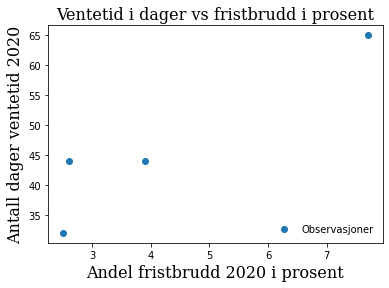

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

#adding axis lables:
ax.set_ylabel('Antall dager ventetid 2020',  fontdict=font)
ax.set_xlabel('Andel fristbrudd 2020 i prosent',  fontdict=font)
ax.set_title("Ventetid i dager vs fristbrudd i prosent",  fontdict=font)

#plotting the function:
ax.scatter(f['Andel fristbrudd 2020'],v['Antall dager ventetid 2020'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

# Kommentar fra meg:
# Jeg valgte å hente tall fra Helsedirektoratet for å sjekke om det er en korrelasjon mellom å ha lang ventetid
# og fristbrudd. Helsedirektoratet har tabell på 4 sektorer og det er de jeg har brukt. Jeg prøvde å finne andre 
# nettsider med tabeller, men de var vanskelige å lese som tabell utfra sidekilden. 
# Utfra de tallene jeg har fått, så viser det at ved økning av ventetid i dager, så øker andel fristbrudd av sykehus
# og behandlingsinstitusjonen. 

In [ ]:
from statsmodels.regression.linear_model import OLS

res=OLS(f['Andel fristbrudd 2020'].astype(float), v['Antall dager ventetid 2020'].astype(float)).fit()

print(res.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Andel fristbrudd 2020   R-squared (uncentered):                   0.941
Model:                               OLS   Adj. R-squared (uncentered):              0.921
Method:                    Least Squares   F-statistic:                              47.56
Date:                   Wed, 27 Apr 2022   Prob (F-statistic):                     0.00625
Time:                           10:47:17   Log-Likelihood:                         -6.1974
No. Observations:                      4   AIC:                                      14.39
Df Residuals:                          3   BIC:                                      13.78
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
# Kommentar
# Den avhengige variabelen er andel fristbrudd i 2020 i prosent. Den viktige delen av regresjon resultatene er 
# R-sqaured som sier noe om hvor mye av den uavhengige variabelen(antall dager ventetid) som forklares av endringer 
# i våre avhengige variabler. Med andre ord, hvor mye øker andel fristbrudd hvis antall ventetid øker med 1. At den
# er positv sier at det er en korrelasjon. 

[(0.0, 70.0)]

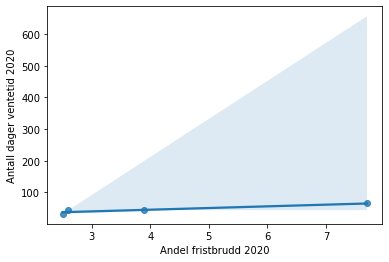

In [ ]:
# Regression            
import seaborn as sns 

sns.regplot(x= f['Andel fristbrudd 2020'], y= v['Antall dager ventetid 2020'])
#Prøvde å endre y-aksen 
ax.set(ylim=(0, 70))